In [343]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import RobustScaler,PowerTransformer
import lightgbm as lgb
import seaborn as sns

In [344]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [345]:
df = pd.read_csv('data/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', encoding="latin-1", delimiter=';')
df.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [346]:
2151264665%16+1

10

In [347]:
data = df[['Ngày','10','11','16']]
data

,Ngày,10,11,16
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.1,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5
...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.1
361,28/12/2021,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6


In [348]:
data = data.set_index('Ngày')

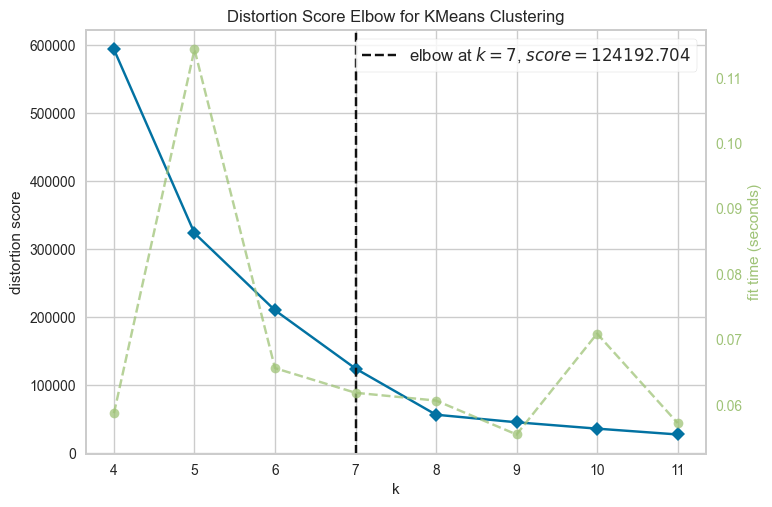

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [349]:
Elbow_M = KElbowVisualizer(KMeans(random_state=23, n_init=10), k=(4,12))
Elbow_M.fit(data)
Elbow_M.show()

In [350]:
data.describe()

,10,11,16
count,365.000000,365.000000,365.000000
mean,1040.277808,1040.311233,1040.326301
std,105.153179,105.147265,105.143470
min,885.700000,885.700000,885.600000
25%,988.400000,988.400000,988.400000
50%,1022.600000,1022.600000,1022.600000
75%,1061.500000,1061.500000,1061.600000
max,1565.500000,1565.500000,1565.500000


# Box Plot

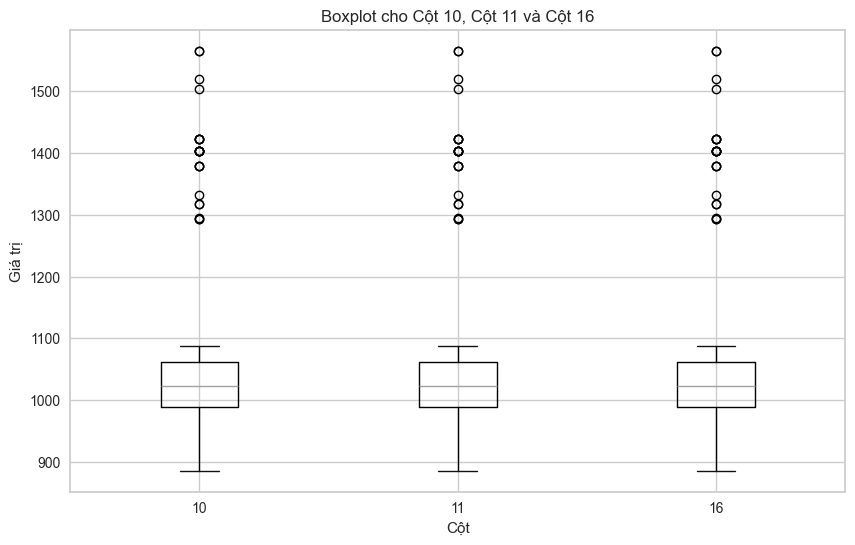

In [351]:
# Tạo boxplot cho cả hai cột
plt.figure(figsize=(10, 6))
data.boxplot()

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot cho Cột 10, Cột 11 và Cột 16')
plt.ylabel('Giá trị')
plt.xlabel('Cột')
plt.show()

# Biểu đồ đường

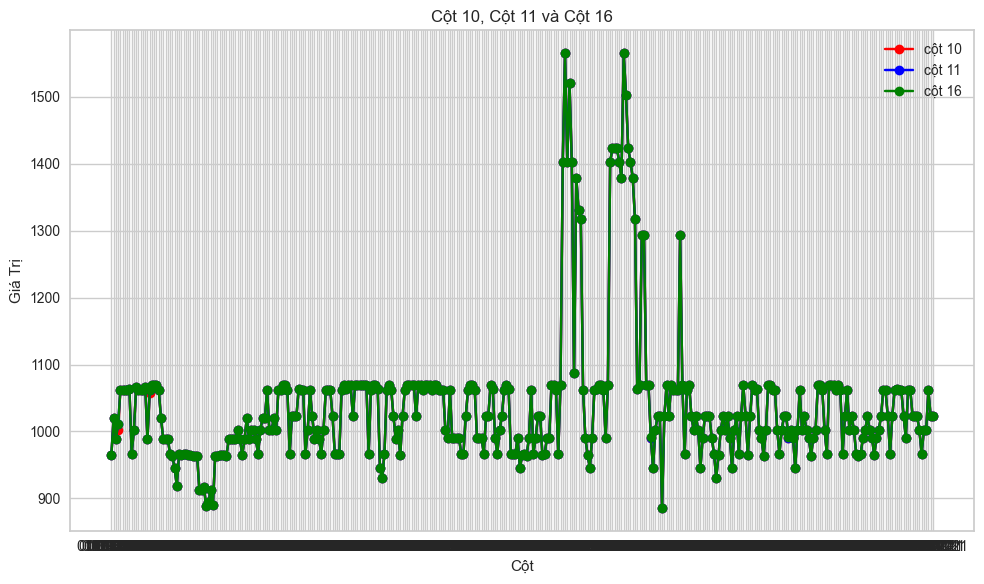

In [352]:

plt.figure(figsize=(10, 6))
plt.plot(data['10'],marker='o',label='cột 10',color='red')
plt.plot(data['11'],marker='o',label='cột 11',color='blue')
plt.plot(data['16'],marker='o',label='cột 16',color='green')
plt.title('Cột 10, Cột 11 và Cột 16')
plt.xlabel('Cột')
plt.ylabel('Giá Trị')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Biều đồ cột

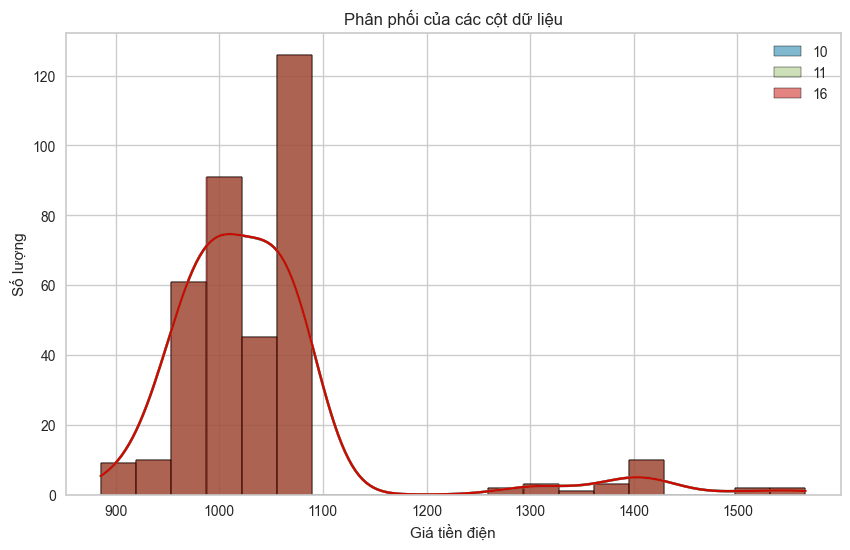

In [353]:
# Trực quan hóa phân phối của các cột dữ liệu
plt.figure(figsize=(10, 6))
for column in data.columns:
    sns.histplot(data[column], bins=20, kde=True, label=column)
plt.xlabel("Giá tiền điện")
plt.ylabel("Số lượng")
plt.title("Phân phối của các cột dữ liệu")
plt.legend()
plt.show()

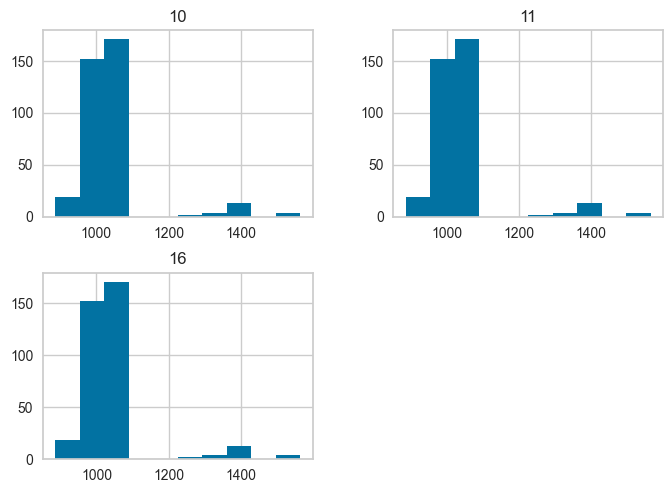

In [354]:
data.hist()
plt.xlabel("Column Name")
plt.ylabel("Frequency")
plt.title("Distribution of Each Column")
plt.subplots_adjust(bottom=0.1)  # Adjust layout for better visibility
plt.show()

# Heat map

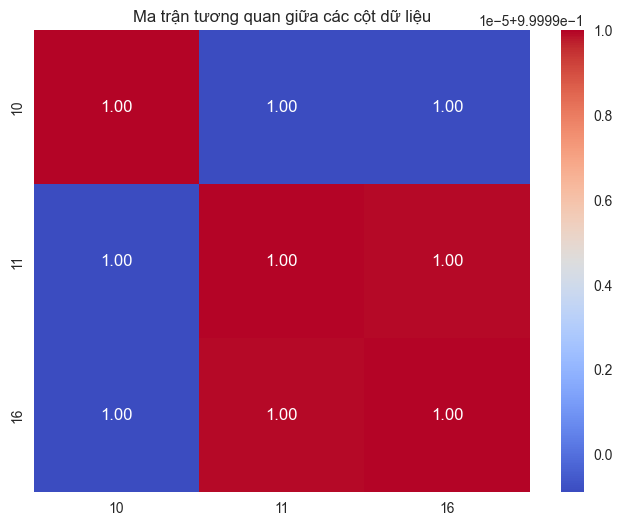

In [355]:
# Kiểm tra mối quan hệ giữa các cột dữ liệu
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các cột dữ liệu")
plt.show()

# Kalman Filter

In [356]:

import pandas as pd
import numpy as np
from filterpy.kalman import KalmanFilter
from sklearn.metrics import mean_squared_error

# Tạo ma trận dữ liệu đo lường
z = data[['10', '11', '16']].values.T

# Khởi tạo Kalman Filter
kf = KalmanFilter(dim_x=1, dim_z=3)

# Tinh chỉnh ma trận 
kf.F = np.array([[1]])  # Ma trận chuyển đổi trạng thái
kf.H = np.array([[1], [1], [1]])  # Ma trận quan sát (3,1)

# Điều chỉnh ma trận hiệp phương sai
kf.Q = np.array([[0.01]])  # Giảm nhiễu quá trình 
kf.R = np.array([[2, 0, 0],  # Tăng nhiễu đo lường 
                  [0, 2, 0],
                  [0, 0, 2]])  

# Khởi tạo trạng thái ban đầu
kf.x = np.array([[np.mean(z[:, 0])]])
kf.P = np.array([[1]])

# Kalman Filter
x_hat_list = []
for k in range(z.shape[1]):
    kf.predict()
    kf.update(z[:, k])
    x_hat_list.append(kf.x[0, 0])

# Thêm cột ước lượng vào DataFrame
data['kalman_estimate'] = x_hat_list

# Đánh giá hiệu suất
rmse = np.sqrt(mean_squared_error(data[['10', '11', '16']].mean(axis=1), data['kalman_estimate']))
print(f"RMSE của Kalman Filter: {rmse}")

# In DataFrame
print(data)


RMSE của Kalman Filter: 73.84554286780782
                10      11      16  kalman_estimate
Ngày                                               
01/01/2021   964.4   964.4   964.4       964.400000
01/02/2021  1019.7  1019.7  1019.7       985.509021
01/03/2021   988.4   988.4   988.4       986.330163
01/04/2021  1002.1  1010.8  1010.8       991.295505
01/05/2021  1061.5  1061.5  1061.5      1005.119832
...            ...     ...     ...              ...
27/12/2021  1002.0  1002.0  1002.1      1017.893069
28/12/2021  1002.0  1002.0  1002.0      1016.062125
29/12/2021  1061.5  1061.5  1061.5      1021.296746
30/12/2021  1022.6  1022.6  1022.6      1021.446886
31/12/2021  1022.6  1022.6  1022.6      1021.579729

[365 rows x 4 columns]


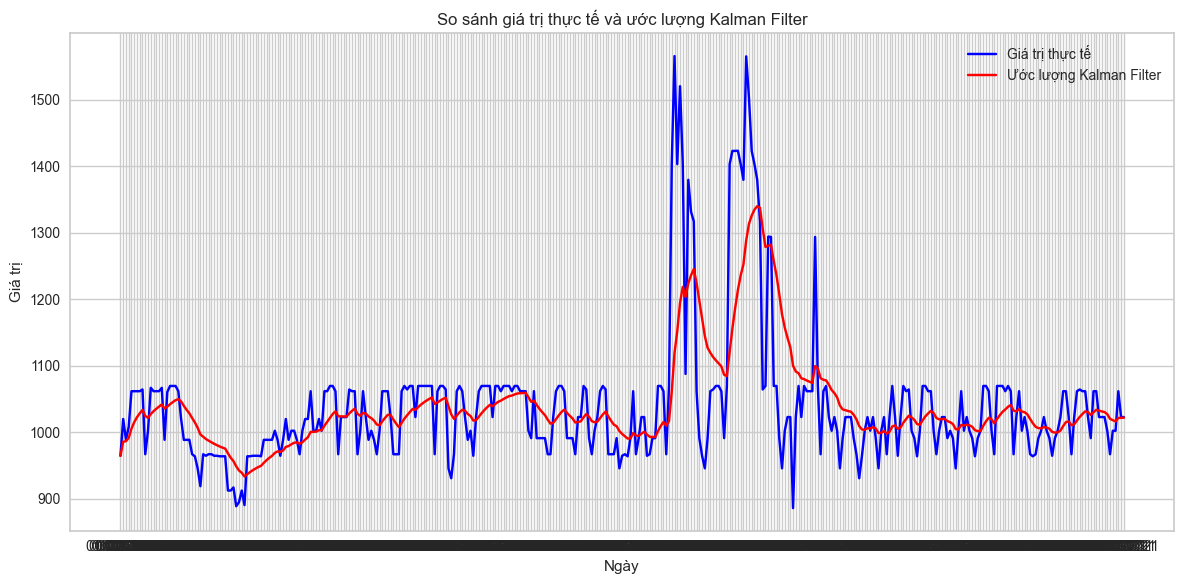

In [357]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[['10', '11', '16']].mean(axis=1), label='Giá trị thực tế', color='blue')
plt.plot(data.index, data['kalman_estimate'], label='Ước lượng Kalman Filter', color='red')
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('So sánh giá trị thực tế và ước lượng Kalman Filter')
plt.legend()
plt.tight_layout()
plt.show()

In [358]:
data.index = pd.to_datetime(data.index, format='%d/%m/%Y') 

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

RMSE của ARIMA: 58.75736413994119
RMSE của Prophet: 48.78109200750296


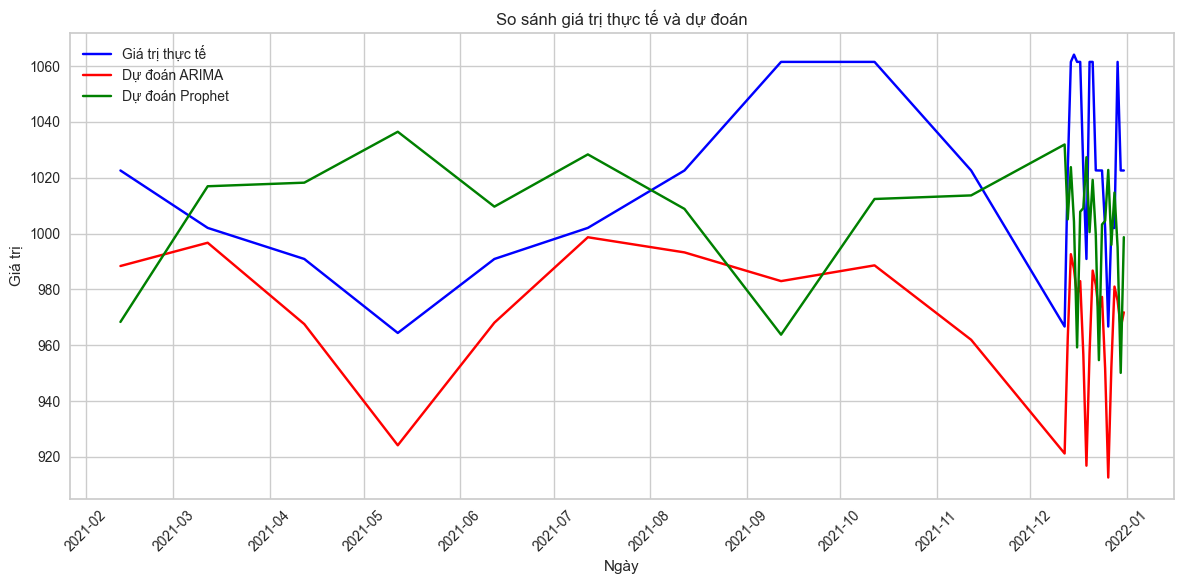

In [360]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from filterpy.kalman import KalmanFilter

#

# Tạo chuỗi thời gian giá trị trung bình
ts = data[['10', '11', '16']].mean(axis=1)

# Chia dữ liệu thành train/test (ví dụ: 30 ngày cuối cùng là test)
train_data = ts[:-30]
test_data = ts[-30:]

# 1. Mô hình ARIMA
# Thay đổi giá trị (p, d, q)(P, D, Q, s)  để tối ưu mô hình
# s = 7 cho dữ liệu ngày, có tính thời vụ tuần
arima_model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 0, 1, 7))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.predict(start=len(train_data), end=len(ts)-1)

# 2. Mô hình Prophet
prophet_data = pd.DataFrame({'ds': train_data.index, 'y': train_data.values})
prophet_model = Prophet()
# Prophet tự động phát hiện tính thời vụ
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=30)
prophet_predictions = prophet_model.predict(future)['yhat'][-30:]

# 3. Kalman Filter
z = data[['10', '11', '16']].values.T
kf = KalmanFilter(dim_x=1, dim_z=3)
kf.F = np.array([[1]])
kf.H = np.array([[1], [1], [1]])
kf.Q = np.array([[0.01]])
kf.R = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])
kf.x = np.array([[np.mean(z[:, 0])]])
kf.P = np.array([[1]])
kalman_predictions = []
for k in range(z.shape[1]):
    kf.predict()
    kf.update(z[:, k])
    kalman_predictions.append(kf.x[0, 0])
kalman_predictions = kalman_predictions[-30:]

# Đánh giá hiệu suất
rmse_arima = np.sqrt(mean_squared_error(test_data, arima_predictions))
rmse_prophet = np.sqrt(mean_squared_error(test_data, prophet_predictions))
rmse_kalman = np.sqrt(mean_squared_error(test_data, kalman_predictions))

print(f"RMSE của ARIMA: {rmse_arima}")
print(f"RMSE của Prophet: {rmse_prophet}")


# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Giá trị thực tế', color='blue')
plt.plot(test_data.index, arima_predictions, label='Dự đoán ARIMA', color='red')
plt.plot(test_data.index, prophet_predictions, label='Dự đoán Prophet', color='green')

plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('So sánh giá trị thực tế và dự đoán')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

RMSE của ARIMA: 58.75736413994119
RMSE của Prophet: 48.78109200750296


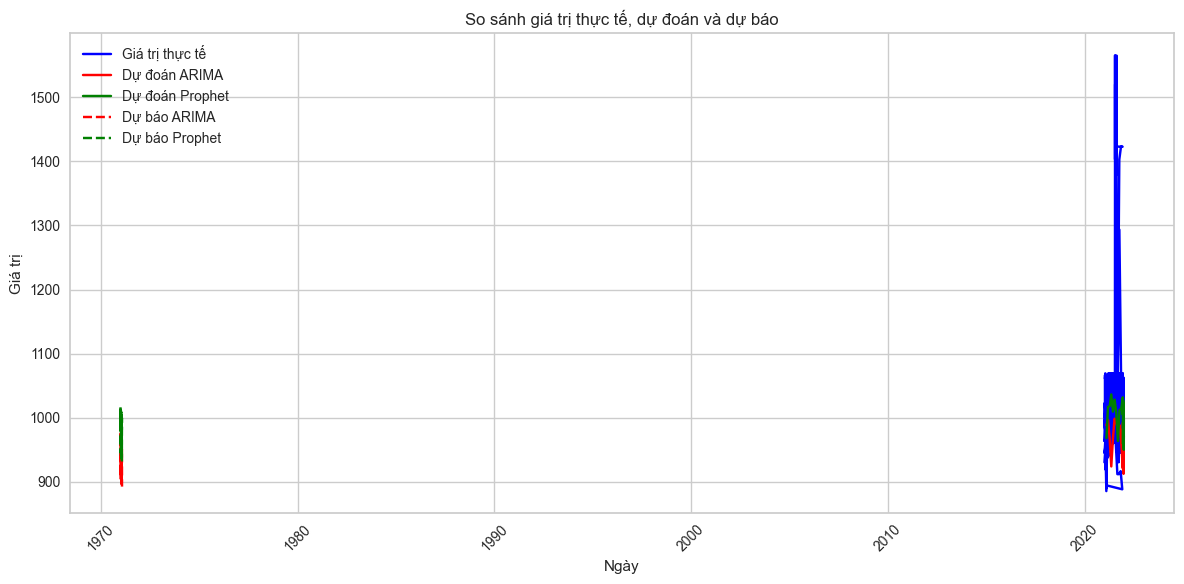

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from prophet import Prophet
# from filterpy.kalman import KalmanFilter

# # Tạo chuỗi thời gian giá trị trung bình
# ts = data[['10', '11', '16']].mean(axis=1)

# # Chia dữ liệu thành train/test (ví dụ: 30 ngày cuối cùng là test)
# train_data = ts[:-30]
# test_data = ts[-30:]

# # 1. Mô hình ARIMA
# # Thay đổi giá trị (p, d, q)(P, D, Q, s)  để tối ưu mô hình
# # s = 7 cho dữ liệu ngày, có tính thời vụ tuần
# arima_model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 0, 1, 7))
# arima_fit = arima_model.fit()

# # Dự đoán trên tập test
# arima_predictions = arima_fit.predict(start=len(train_data), end=len(ts)-1)

# # Dự đoán tương lai (ví dụ: 30 ngày tiếp theo)
# arima_forecast = arima_fit.predict(start=len(ts), end=len(ts) + 29)

# # 2. Mô hình Prophet
# prophet_data = pd.DataFrame({'ds': train_data.index, 'y': train_data.values})
# prophet_model = Prophet()
# # Prophet tự động phát hiện tính thời vụ
# prophet_model.fit(prophet_data)


# # Dự đoán tương lai (ví dụ: 30 ngày tiếp theo)
# future = prophet_model.make_future_dataframe(periods=60) # Tạo DataFrame cho 30 ngày test + 30 ngày dự đoán
# prophet_predictions = prophet_model.predict(future)['yhat'][-60:] # Lấy 60 giá trị dự đoán cuối
# prophet_test_predictions = prophet_predictions[:30]
# prophet_forecast = prophet_predictions[30:]

# # 3. Kalman Filter (Không dự đoán tương lai trực tiếp)

# # ... (Code Kalman Filter giữ nguyên)

# # Đánh giá hiệu suất
# rmse_arima = np.sqrt(mean_squared_error(test_data, arima_predictions))
# rmse_prophet = np.sqrt(mean_squared_error(test_data, prophet_test_predictions))

# print(f"RMSE của ARIMA: {rmse_arima}")
# print(f"RMSE của Prophet: {rmse_prophet}")

# # Vẽ biểu đồ so sánh
# plt.figure(figsize=(12, 6))

# # Dữ liệu thực tế
# plt.plot(ts.index, ts, label='Giá trị thực tế', color='blue')

# # Dự đoán trên tập test
# plt.plot(test_data.index, arima_predictions, label='Dự đoán ARIMA', color='red')
# plt.plot(test_data.index, prophet_test_predictions, label='Dự đoán Prophet', color='green')

# # Dự đoán tương lai
# plt.plot(arima_forecast.index, arima_forecast, label='Dự báo ARIMA', color='red', linestyle='--')
# plt.plot(prophet_forecast.index, prophet_forecast, label='Dự báo Prophet', color='green', linestyle='--')

# plt.xlabel('Ngày')
# plt.ylabel('Giá trị')
# plt.title('So sánh giá trị thực tế, dự đoán và dự báo')
# plt.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()